In [38]:
import csv
import re
import collections
import operator
from collections import Counter
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class tweet:
  def __init__(self, t):
    self.timestamp = t[0]
    self.author = t[1]
    self.content = t[2]

In [3]:
with open("twitter.tsv", encoding="utf8") as fd:
    
    tweets = []
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    counter = 0
    for row in rd:
        tweets.append(tweet(row))

In [4]:
edges = {}

for t in tweets:
    if "@" in t.content:
        mentioned = re.findall("@(\w+)",t.content)
        for m in mentioned:
            key = tuple([t.author, m])
            if key in edges.keys():
                edges[key] += 1
            else:
                edges[key] = 1

In [5]:
#print(edges)

G = nx.DiGraph()

for k, v in edges:
    G.add_edge(k, v, weight=edges[(k,v)])
    
# Draw Graph
#weights = [G[u][v]['weight'] for u,v in edges]
#nx.draw(G, with_labels=True, node_size=60,font_size=10, width=weights)
#plt.show()

Reterns largest weakly connected subgraph    

In [6]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
SG = G.subgraph(largest_cc)

#### Challenges that you might have encountered when parsing and cleaning the data and when creating the graph, and how you solved them. Discuss as well any decisions that you might have made.

## Statistics for the graph

#### Number Of Nodes
Getting the number of nodes in the graph

In [7]:
numberOfNodes = G.number_of_nodes()

#### Number Of Edges
Getting the number of edges in the graph

In [8]:
numberOfEdges = G.number_of_edges()

#### In-Degree

In [9]:
inDegree = G.in_degree()

#### Out-Degree

In [10]:
outDegree = G.out_degree()

#### Degree Distribution

##### Histogram

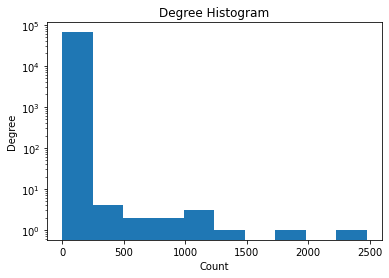

In [11]:
plt.title("Degree Histogram")
plt.xlabel("Count")
plt.ylabel("Degree")

degrees = [G.degree(n) for n in G.nodes()]

plt.hist(degrees,log='true')
plt.show()

##### Scatter Plot

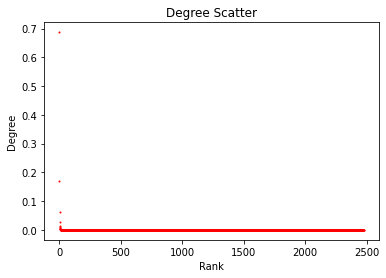

In [12]:
plt.title("Degree Scatter")
plt.xlabel("Rank")
plt.ylabel("Degree")

degree=nx.degree_histogram(G)
degree.sort(reverse=True)
#Convert frequency to frequency and use list connotation
y=[z/float(sum(degree))for z in degree]

#Generate X axis sequence, from 1 to maximum degree
x=range(len(degree))
plt.scatter(x,y,s=1,color=(1,0,0))

plt.show()

#### Average Path Length

In [13]:
averagePathLength = nx.average_shortest_path_length(SG)

#### Global Clustering Coeefficient

In [14]:
#The average clustering coefficient for the graph G
clusteringCoeefficient = nx.average_clustering(G)

#Compute graph transitivity, the fraction of all possible triangles present in G.
transitivity = nx.transitivity(G)

### Printing Statistics

## Determining the Top 10 users

In [15]:
def printDict(d):
    for key in d:
        print(key, '\t:\t', d[key])

In [16]:
def printTopN(d, n):
    counter = 1
    for key in d:
        print(key, '\t:\t', d[key])
        if (counter >= n):
            break
        counter +=1

In [17]:
def sortDictDesc(d):
    sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
    return sorted_d

The degree centrality for a node v is the fraction of nodes it is connected to.

In [18]:
degreeCentrality = nx.degree_centrality(G)
degreeCentrality = sortDictDesc(degreeCentrality)

Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes.

In [19]:
closenessCentrality = nx.closeness_centrality(G)
closenessCentrality = sortDictDesc(closenessCentrality)

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v

In [20]:
betweennessCentrality = nx.betweenness_centrality(G)
betweennessCentrality = sortDictDesc(betweennessCentrality)

In [21]:
print("Degree Centrality\n")
printTopN(degreeCentrality, 10)
print("\n\nCloseness Centrality\n")
printTopN(closenessCentrality, 10)
print("\n\nBetweenness Centrality\n")
printTopN(betweennessCentrality, 10)

Degree Centrality

theiphoneblog 	:	 0.037637433659270976
ryanbarr 	:	 0.0270989522346751
mashable 	:	 0.019191289405252512
squarespace 	:	 0.015572012956401406
scottbourne 	:	 0.015419942517374049
ScanCafe 	:	 0.015404735473471312
iphone_dev 	:	 0.013245335239282837
tweetmeme 	:	 0.011876701288036619
TweetDeck 	:	 0.009397953131890692
kevinrose 	:	 0.00783162760990891


Closeness Centrality

theiphoneblog 	:	 0.027427802451198077
ryanbarr 	:	 0.026914331574782308
mashable 	:	 0.02663036318100742
iphone_dev 	:	 0.02255799832103937
reneritchie 	:	 0.0208254544501898
MuscleNerd 	:	 0.020822118432203253
chrispirillo 	:	 0.020199392874692457
twittelator 	:	 0.019479052477141254
palmsolo 	:	 0.01925193466205196
backlon 	:	 0.01921324516522264


Betweenness Centrality

theiphoneblog 	:	 0.0004253726048982866
filjedi 	:	 0.0002926259536491623
msproductions 	:	 0.00029029017378310397
lemonkey 	:	 0.0002066224788538912
dreadpiratepj 	:	 0.00019356789904008073
serban 	:	 0.00019314523704854261
i

## Visualise the Graph

In [43]:
weights = [G[u][v]['weight'] for u,v in edges]

node_sizes = []
for n in closenessCentrality:
    #print(closenessCentrality[n])
    node_sizes.append(10000*closenessCentrality[n])

#nx.draw(G, node_size=node_sizes,with_labels=True, font_size=4, width=weights)
#plt.show()

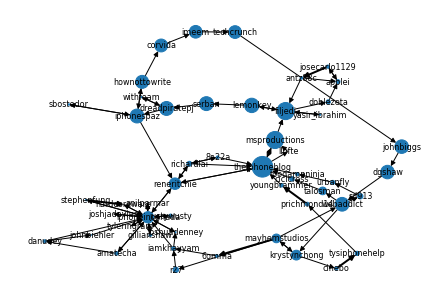

In [79]:
largest_cc = max(nx.strongly_connected_components(G), key=len)
SG = G.subgraph(largest_cc)

weights = [G[u][v]['weight'] for u,v in edges]

node_sizes = []
for n in SG.nodes():
    node_sizes.append(1000000*betweennessCentrality[n])

nx.draw_kamada_kawai(SG, node_size=node_sizes, with_labels=True, font_size=8, width=weights)
plt.show()